In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from scipy.signal import savgol_filter  
import folium
import matplotlib.gridspec as gridspec  

In [11]:
file_path = "/Users/arjun/Downloads/Pharmacy_OLTP_SLStyle_18Months.csv"
sales = pd.read_csv(file_path)
sales.head()
print("Total rows:", len(sales))

Total rows: 50000


In [34]:
print(sales.columns.tolist())  # List of all column names
print("\nNumber of columns:", len(sales.columns))
num_cols = len(sales.columns)

['Transaction_ID', 'Transaction_Date', 'Branch_ID', 'Branch_Name', 'District', 'Province', 'Payment_Method', 'Customer_Gender', 'Customer_Age', 'Customer_City', 'Medicine_ID', 'Medicine_Name', 'Generic_Name', 'Medicine_Category', 'Dosage_Form', 'Strength_mg', 'Pack_Size', 'Supplier_Name', 'Prescription_Required', 'Batch_No', 'Expiry_Date', 'Quantity', 'Unit_Price_LKR', 'Discount_Rate', 'Line_Total_LKR', 'Year', 'Month']

Number of columns: 27


**EDA**

In [43]:
#null value check
print(sales.isnull().sum()) #results shows Strength_mg has 31236 null values

print((sales.isnull().sum() / len(sales) * 100).round(2))
#62.47 % null values in that one colomn only

Transaction_ID               0
Transaction_Date             0
Branch_ID                    0
Branch_Name                  0
District                     0
Province                     0
Payment_Method               0
Customer_Gender              0
Customer_Age                 0
Customer_City                0
Medicine_ID                  0
Medicine_Name                0
Generic_Name                 0
Medicine_Category            0
Dosage_Form                  0
Strength_mg              31236
Pack_Size                    0
Supplier_Name                0
Prescription_Required        0
Batch_No                     0
Expiry_Date                  0
Quantity                     0
Unit_Price_LKR               0
Discount_Rate                0
Line_Total_LKR               0
Year                         0
Month                        0
dtype: int64
Transaction_ID            0.00
Transaction_Date          0.00
Branch_ID                 0.00
Branch_Name               0.00
District                  

In [42]:
#duplicate check
print("Duplicate rows:", sales.duplicated().sum())


Duplicate rows: 0


In [45]:
print(sales.describe())

       Transaction_ID            Transaction_Date     Branch_ID  Customer_Age  \
count    50000.000000                       50000  50000.000000  50000.000000   
mean     25000.500000  2022-09-30 02:25:10.848000      4.001940     48.915940   
min          1.000000         2022-01-01 00:00:00      1.000000     18.000000   
25%      12500.750000         2022-05-17 00:00:00      2.000000     33.000000   
50%      25000.500000         2022-09-30 00:00:00      4.000000     49.000000   
75%      37500.250000         2023-02-13 00:00:00      6.000000     65.000000   
max      50000.000000         2023-06-30 00:00:00      7.000000     80.000000   
std      14433.901067                         NaN      2.004319     18.159583   

        Medicine_ID   Strength_mg     Pack_Size      Quantity  Unit_Price_LKR  \
count  50000.000000  18764.000000  50000.000000  50000.000000    50000.000000   
mean      74.543920    350.273129     35.769760      3.000780     1878.785603   
min        1.000000     50.

In [49]:
print(sales[sales['Strength_mg'].isnull()]['Dosage_Form'].value_counts())

Dosage_Form
Cream       7982
Sachet      6320
Inhaler     5814
Ointment    5741
Syrup       5379
Name: count, dtype: int64


In [48]:
print(sales[sales['Strength_mg'].notnull()]['Dosage_Form'].value_counts())

Dosage_Form
Capsule    8103
Tablet     5616
Drops      5045
Name: count, dtype: int64


In [51]:
#Strength_mg is not really needed to answer our business question, so i am dropping it for more clean dataset
sales.drop(columns=['Strength_mg'], inplace=True)
print(sales.dtypes)


Transaction_ID                    int64
Transaction_Date         datetime64[ns]
Branch_ID                         int64
Branch_Name                      object
District                         object
Province                         object
Payment_Method                   object
Customer_Gender                  object
Customer_Age                      int64
Customer_City                    object
Medicine_ID                       int64
Medicine_Name                    object
Generic_Name                     object
Medicine_Category                object
Dosage_Form                      object
Pack_Size                         int64
Supplier_Name                    object
Prescription_Required            object
Batch_No                         object
Expiry_Date                      object
Quantity                          int64
Unit_Price_LKR                  float64
Discount_Rate                   float64
Line_Total_LKR                  float64
Year                              int64


In [54]:
#check for unique values in categorical colomns

cat_cols = ["Branch_Name", "Medicine_Category", "Payment_Method","Customer_Gender", "Prescription_Required",
            "Supplier_Name", "Dosage_Form", "Province"]
for col in cat_cols:
    print(f"\n{col} ({sales[col].nunique()} unique):")
    print(sales[col].value_counts())


Branch_Name (7 unique):
Branch_Name
Pharmacy - Colombo Fort    7247
Pharmacy - Kurunegala      7236
Pharmacy - Ratnapura       7201
Pharmacy - Jaffna          7160
Pharmacy - Galle           7104
Pharmacy - Negombo         7041
Pharmacy - Kandy City      7011
Name: count, dtype: int64

Medicine_Category (15 unique):
Medicine_Category
Antibiotic      7632
Cardiac         6499
Painkiller      5008
Vitamin         4873
Cough & Cold    4088
Gastro          3436
Diabetes        3377
Dermatology     3363
First Aid       2707
Hormonal        2363
Allergy         2034
Antiviral       1627
Respiratory     1301
Antifungal      1047
Wellness         645
Name: count, dtype: int64

Payment_Method (3 unique):
Payment_Method
Cash         22652
Card         19886
Insurance     7462
Name: count, dtype: int64

Customer_Gender (2 unique):
Customer_Gender
Female    25877
Male      24123
Name: count, dtype: int64

Prescription_Required (2 unique):
Prescription_Required
No     27455
Yes    22545
Name: coun

In [57]:
#numerical colomn range check
num_cols = ["Customer_Age", "Quantity", "Unit_Price_LKR","Discount_Rate", "Line_Total_LKR"]
for col in num_cols:
    print(f"{col}: min={sales[col].min()}, max={sales[col].max()}, mean={sales[col].mean():.2f}")


Customer_Age: min=18, max=80, mean=48.92
Quantity: min=1, max=5, mean=3.00
Unit_Price_LKR: min=26.24, max=4499.41, mean=1878.79
Discount_Rate: min=0.0, max=0.15, mean=0.07
Line_Total_LKR: min=29.34, max=21933.45, mean=5205.64


**EDA plots**

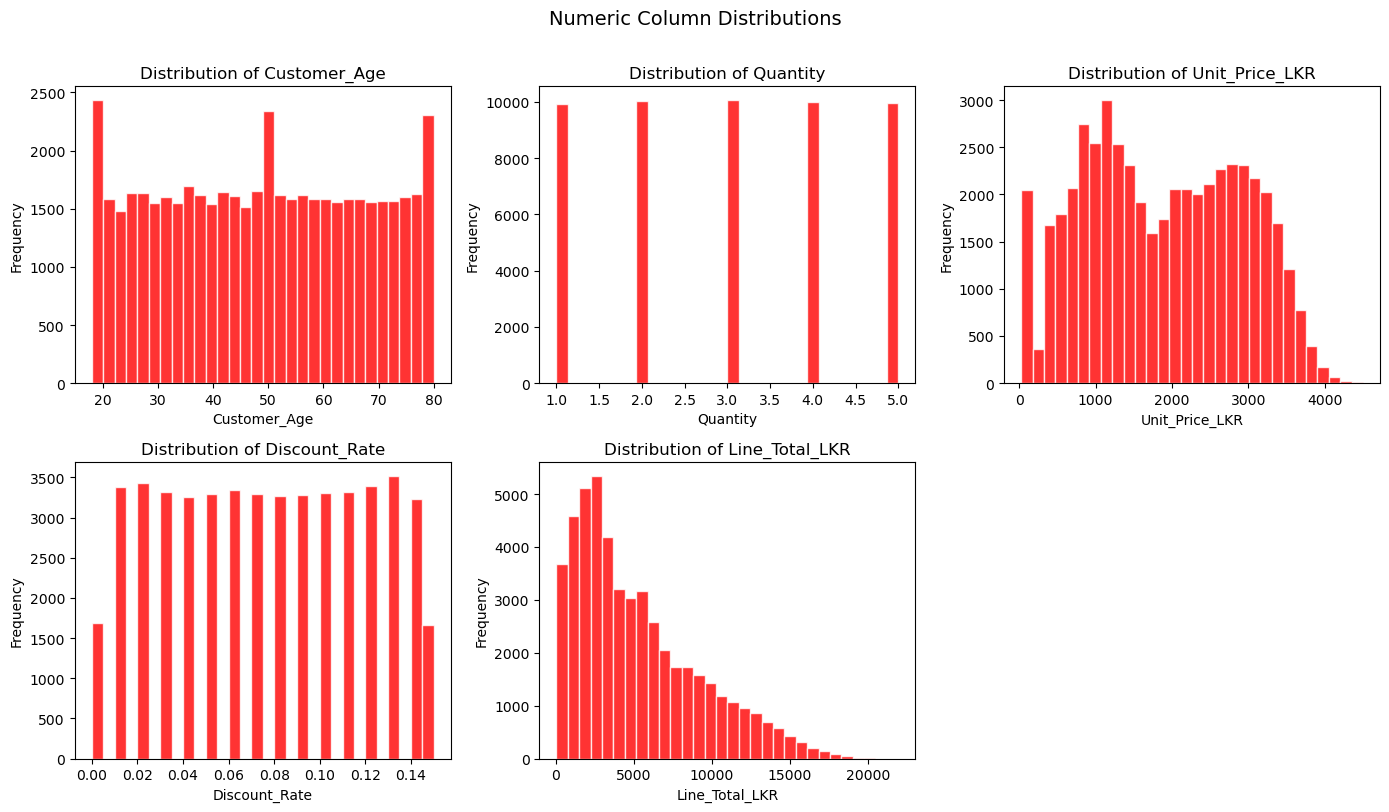

In [69]:
#numerical colomns 


fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(sales[col].dropna(), bins=30, color="red",
                 edgecolor="white", alpha=0.8)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

axes[5].set_visible(False)

plt.suptitle("Numeric Column Distributions", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

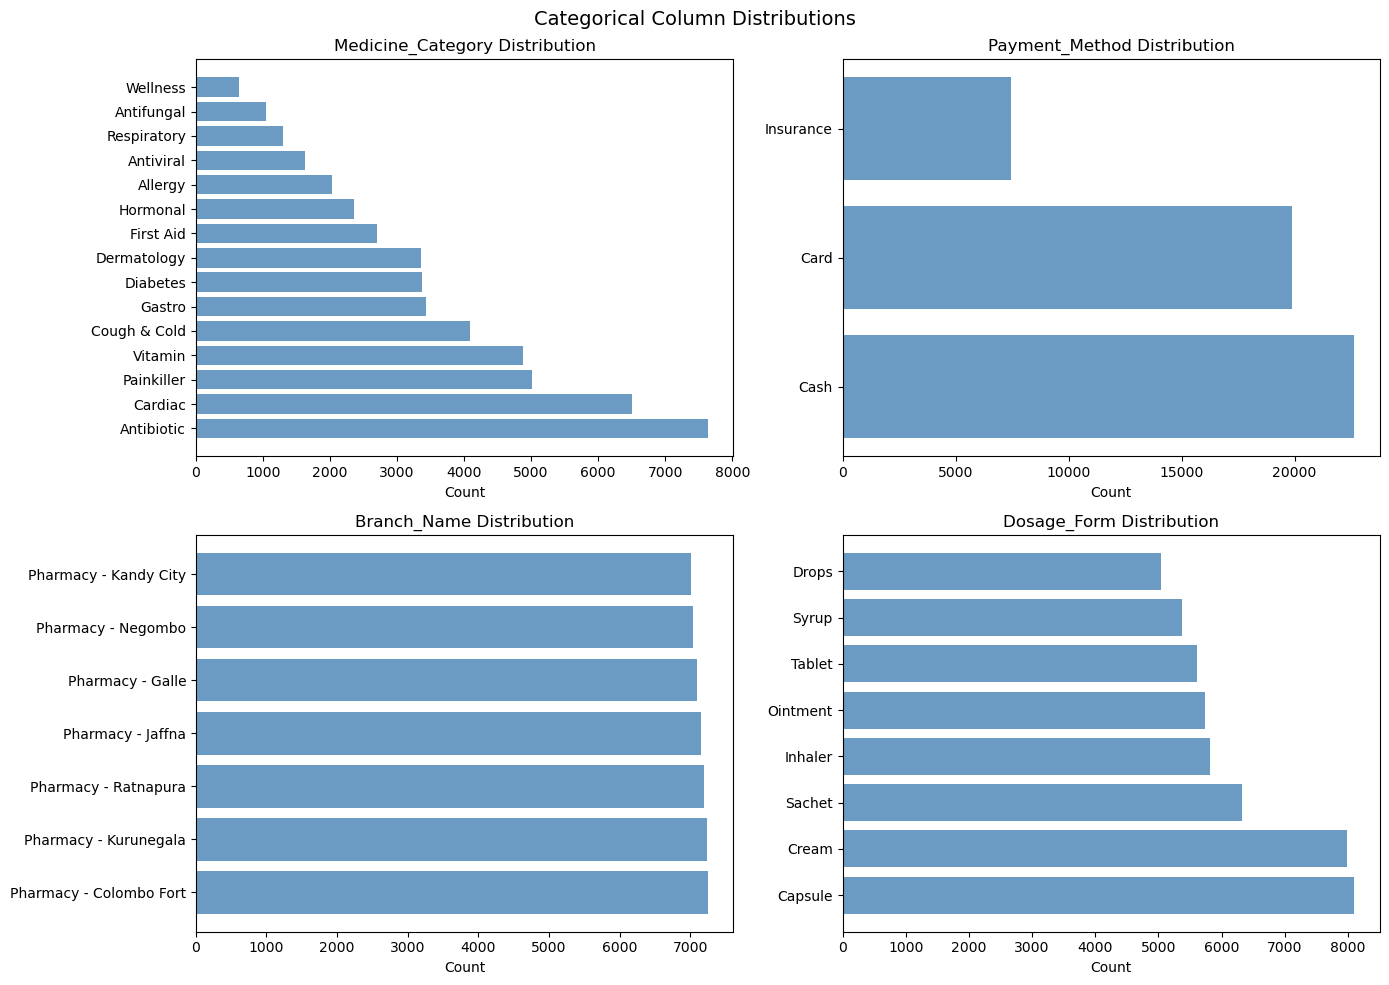

In [64]:
#cateforical colomns EDA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(["Medicine_Category", "Payment_Method","Branch_Name", "Dosage_Form"]):
    counts = sales[col].value_counts()
    axes[i].barh(counts.index, counts.values, color="steelblue", alpha=0.8)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("Count")

plt.suptitle("Categorical Column Distributions", fontsize=14)
plt.tight_layout()
plt.show()

**correlation check**

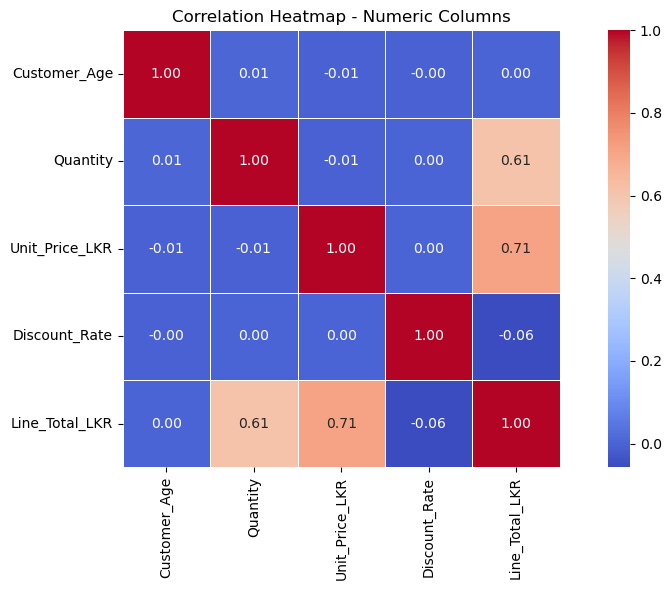

In [67]:
plt.figure(figsize=(10, 6))
correlation = sales[num_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.5, square=True)
plt.title("Correlation Heatmap - Numeric Columns")
plt.tight_layout()
plt.show()

In [73]:
#colomn addition for better usage of data
sales["Expiry_Date"] = pd.to_datetime(sales["Expiry_Date"], errors="coerce") #format change
sales["Day_of_Week"] = sales["Transaction_Date"].dt.day_name() #new colomn addition
sales["Quarter"] = "Q" + sales["Transaction_Date"].dt.quarter.astype(str) 
sales["Month_Name"] = sales["Transaction_Date"].dt.strftime("%b")
sales["Days_to_Expiry"] = (sales["Expiry_Date"] - sales["Transaction_Date"]).dt.days

bins   = [0,  30,  45,  60,  100]
labels = ["Young (18-30)", "Middle (31-45)", "Senior (46-60)", "Elderly (61+)"]
sales["Age_Group"] = pd.cut(sales["Customer_Age"], bins=bins,labels=labels, right=True)

sales["Branch_Short"] = sales["Branch_Name"].str.replace("Pharmacy - ", "",regex=False)


In [105]:
#Revenue check

sales["Revenue_Check"] = (sales["Quantity"] * sales["Unit_Price_LKR"] * (1 - sales["Discount_Rate"])).round(2)
mismatch = (sales["Revenue_Check"] - sales["Line_Total_LKR"]).abs() > 0.05
print(f"Revenue verification: {mismatch.sum()} mismatched rows")
sales.drop(columns=["Revenue_Check"], inplace=True)

Revenue verification: 0 mismatched rows


In [78]:
#Finalnull check after data cleaning
print(sales.isnull().sum())

Transaction_ID           0
Transaction_Date         0
Branch_ID                0
Branch_Name              0
District                 0
Province                 0
Payment_Method           0
Customer_Gender          0
Customer_Age             0
Customer_City            0
Medicine_ID              0
Medicine_Name            0
Generic_Name             0
Medicine_Category        0
Dosage_Form              0
Pack_Size                0
Supplier_Name            0
Prescription_Required    0
Batch_No                 0
Expiry_Date              0
Quantity                 0
Unit_Price_LKR           0
Discount_Rate            0
Line_Total_LKR           0
Year                     0
Month                    0
Day_of_Week              0
Quarter                  0
Month_Name               0
Days_to_Expiry           0
Age_Group                0
Branch_Short             0
dtype: int64


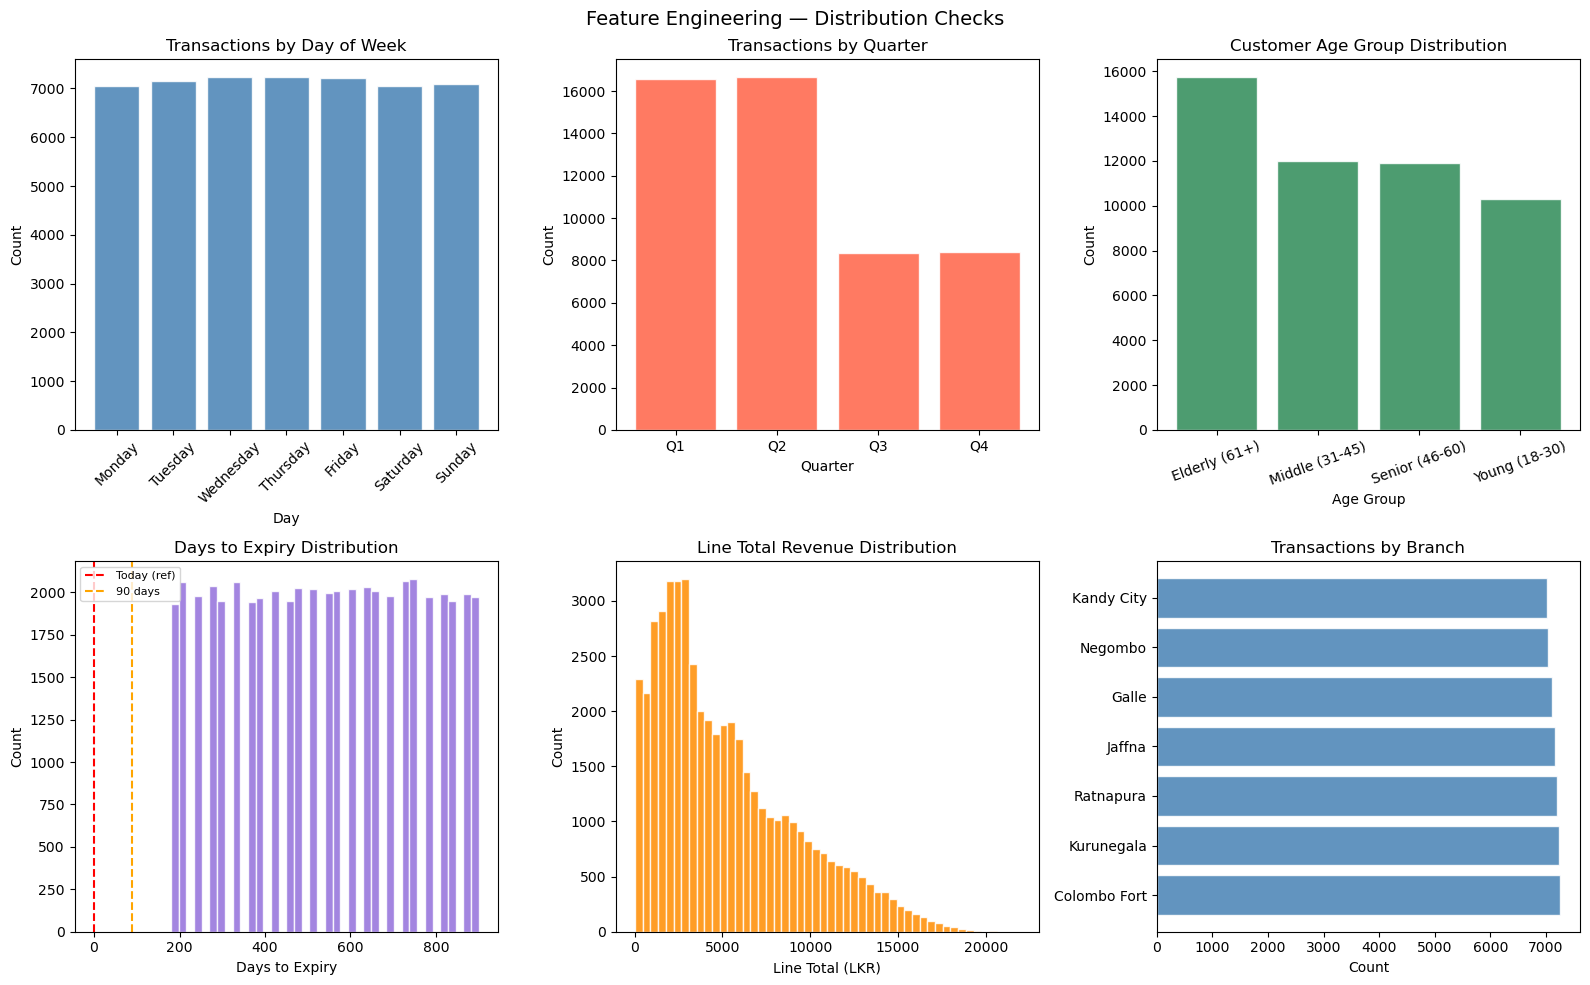

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Feature Engineering — Distribution Checks", fontsize=14)

# Day of week distribution
day_order = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
day_counts = sales["Day_of_Week"].value_counts().reindex(day_order)
axes[0,0].bar(day_counts.index, day_counts.values,color="steelblue", edgecolor="white", alpha=0.85)
axes[0,0].set_title("Transactions by Day of Week")
axes[0,0].set_xlabel("Day")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis="x", rotation=45)

# Quarter distribution
q_counts = sales["Quarter"].value_counts().sort_index()
axes[0,1].bar(q_counts.index, q_counts.values,color="tomato", edgecolor="white", alpha=0.85)
axes[0,1].set_title("Transactions by Quarter")
axes[0,1].set_xlabel("Quarter")
axes[0,1].set_ylabel("Count")

# Age group distribution
age_counts = sales["Age_Group"].value_counts()
axes[0,2].bar(age_counts.index.astype(str), age_counts.values,color="seagreen", edgecolor="white", alpha=0.85)
axes[0,2].set_title("Customer Age Group Distribution")
axes[0,2].set_xlabel("Age Group")
axes[0,2].set_ylabel("Count")
axes[0,2].tick_params(axis="x", rotation=20)

# Days to expiry distribution
axes[1,0].hist(sales["Days_to_Expiry"].dropna(), bins=40,color="mediumpurple", edgecolor="white", alpha=0.85)
axes[1,0].axvline(0, color="red", linestyle="--",linewidth=1.5, label="Today (ref)")
axes[1,0].axvline(90, color="orange", linestyle="--",linewidth=1.5, label="90 days")
axes[1,0].set_title("Days to Expiry Distribution")
axes[1,0].set_xlabel("Days to Expiry")
axes[1,0].set_ylabel("Count")
axes[1,0].legend(fontsize=8)

# Total Revenue distribution
axes[1,1].hist(sales["Line_Total_LKR"], bins=50,color="darkorange", edgecolor="white", alpha=0.85)
axes[1,1].set_title("Line Total Revenue Distribution")
axes[1,1].set_xlabel("Line Total (LKR)")
axes[1,1].set_ylabel("Count")

# transaction count by branch
b_counts = sales["Branch_Short"].value_counts()
axes[1,2].barh(b_counts.index, b_counts.values,color="steelblue", edgecolor="white", alpha=0.85)
axes[1,2].set_title("Transactions by Branch")
axes[1,2].set_xlabel("Count")

plt.tight_layout()
plt.savefig("eda_stage3_features.png", dpi=150, bbox_inches="tight")
plt.show()

In [88]:
sales.to_csv("pharmacy_cleaned.csv", index=False)
#from here ownwards i am going to proceed with cleaned data
sales_cleaned = pd.read_csv("pharmacy_cleaned.csv") #so this will be used in tableau for creating dashboards

**Time Series Revenue Trend**

In [85]:
sales_cleaned["Transaction_Date"] = pd.to_datetime(sales_cleaned["Transaction_Date"])

#grouping transaction date based on month
monthly = sales_cleaned.groupby(sales_cleaned["Transaction_Date"].dt.to_period("M"))["Line_Total_LKR"].sum()
monthly.index = monthly.index.to_timestamp() 


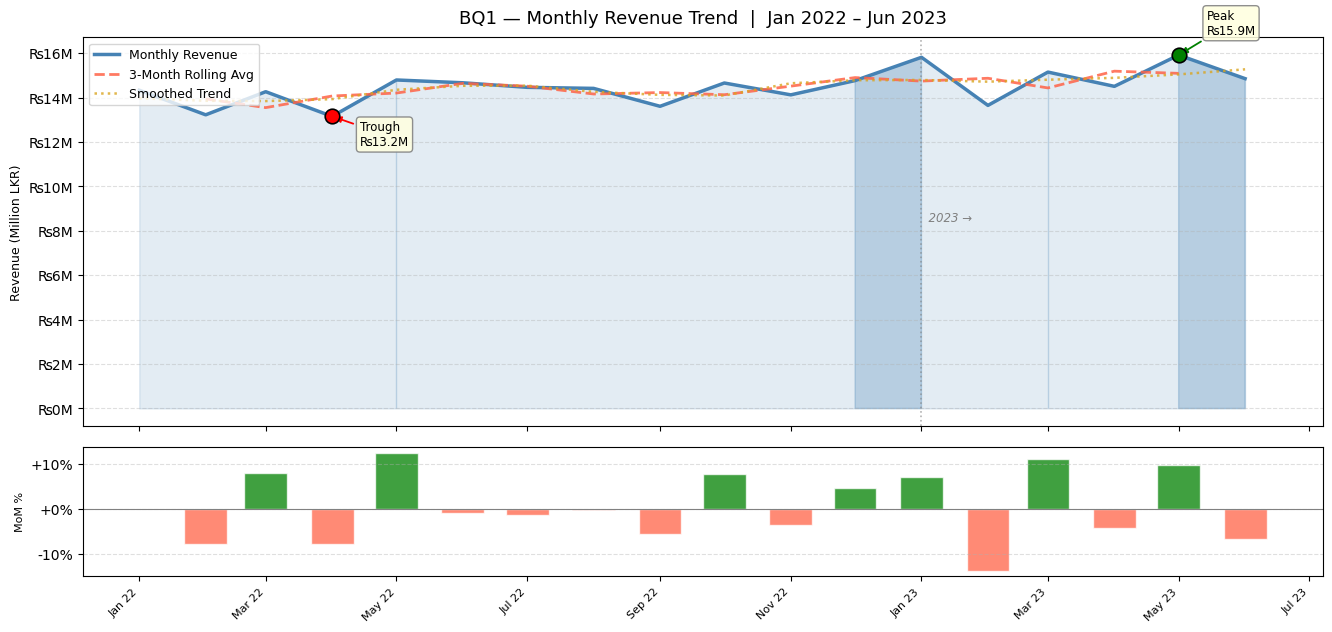

In [164]:
rolling_avg = monthly.rolling(window=3, center=True).mean() #rolling average calculation for 3 consecutive month together, center : plotted at middle
mom_pct     = monthly.pct_change() * 100  #MoM percentage change

trend = savgol_filter(monthly.values / 1e6, window_length=7, polyorder=2)#smooth trend line

fig = plt.figure(figsize=(16, 7))
gs  = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.08)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)  

rev = monthly.values / 1e6
ax1.fill_between(monthly.index, rev, alpha=0.15, color="steelblue")

p70 = np.percentile(rev, 70)
ax1.fill_between(monthly.index, rev,where=rev > p70,alpha=0.28, color="steelblue")
ax1.plot(monthly.index, rev,color="steelblue", linewidth=2.5,label="Monthly Revenue")

ax1.plot(monthly.index, rolling_avg.values / 1e6,color="tomato", 
         linewidth=2,linestyle="--", alpha=0.85,label="3-Month Rolling Avg")
ax1.plot(monthly.index, trend,color="goldenrod", linewidth=1.8,
         linestyle=":", alpha=0.8,label="Smoothed Trend")

peak_idx   = int(np.argmax(rev))
trough_idx = int(np.argmin(rev))

for idx, label, color, dy in [
    (peak_idx,   "Peak",   "green", 0.5),
    (trough_idx, "Trough", "red",  -0.7)
]:
    ax1.scatter(monthly.index[idx], rev[idx],
                s=110, color=color, zorder=6,
                edgecolors="black", linewidths=1.2)
    ax1.annotate(
        f"{label}\n₨{rev[idx]:.1f}M",
        xy=(monthly.index[idx], rev[idx]),
        xytext=(20, dy * 30),
        textcoords="offset points",
        fontsize=8.5,
        arrowprops=dict(arrowstyle="-|>", color=color,
                        lw=1.3, mutation_scale=9),
        bbox=dict(boxstyle="round,pad=0.3",
                  fc="lightyellow", ec="grey", alpha=0.88)
    )

sep_date = pd.Timestamp("2023-01-01")
ax1.axvline(sep_date, color="grey", linewidth=1.2,
            linestyle=":", alpha=0.6)
ax1.text(sep_date, rev.max() * 0.53,
         "  2023 →", fontsize=8.5,
         color="grey", style="italic")



ax1.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"₨{v:.0f}M"))
ax1.set_ylabel("Revenue (Million LKR)", fontsize=9)
ax1.grid(axis="y", linestyle="--", alpha=0.4)
ax1.legend(loc="upper left", fontsize=9)
ax1.set_title("BQ1 — Monthly Revenue Trend  |  Jan 2022 – Jun 2023",
              fontsize=13, pad=10)


plt.setp(ax1.get_xticklabels(), visible=False)

bar_colors = ["green" if v >= 0 else "tomato" for v in mom_pct]
ax2.bar(monthly.index, mom_pct.values,
        color=bar_colors, alpha=0.75,
        width=20, edgecolor="white")
ax2.axhline(0, color="grey", linewidth=0.8)
ax2.set_ylabel("MoM %", fontsize=8)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:+.0f}%"))
ax2.grid(axis="y", linestyle="--", alpha=0.4)

ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.subplots_adjust()
plt.savefig("BQ1_stage3.png", dpi=150, bbox_inches="tight")
plt.show()







In [97]:
#calculation for revenue per branch
sales_cleaned["Branch_Short"] = sales_cleaned["Branch_Name"].str.replace("Pharmacy - ", "", regex=False)
branch_revenue = sales_cleaned.groupby("Branch_Short")["Line_Total_LKR"].sum()
branch_txns    = sales_cleaned.groupby("Branch_Short")["Transaction_ID"].count()

#transaction made per customer per city
city_stats = sales_cleaned.groupby("Customer_City").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count")
).reset_index()

# Coordinates – i found out using 
branch_coords = {
    "Colombo Fort": (6.9355, 79.8507),
    "Negombo":      (7.2081, 79.8358),
    "Kandy City":   (7.2906, 80.6337),
    "Galle":        (6.0535, 80.2210),
    "Jaffna":       (9.6615, 80.0255),
    "Kurunegala":   (7.4818, 80.3609),
    "Ratnapura":    (6.6828, 80.3992),
}

city_coords = {
    "Colombo":    (6.9271, 79.8612),
    "Kandy":      (7.2906, 80.6337),
    "Galle":      (6.0535, 80.2210),
    "Jaffna":     (9.6615, 80.0255),
    "Kurunegala": (7.4818, 80.3609),
    "Matara":     (5.9549, 80.5550),
    "Negombo":    (7.2081, 79.8358),
    "Ratnapura":  (6.6828, 80.3992),
}

m = folium.Map(location=[7.8731, 80.7718], zoom_start=7) #default folium setting

In [98]:
#branch bubbles
max_revenue = branch_revenue.max()

In [106]:
for branch, (lat, lon) in branch_coords.items():
    rev   = branch_revenue.get(branch, 0)
    txns  = branch_txns.get(branch, 0)
    radius = (rev / max_revenue) * 40 + 10 # Scale bubble size by revenue

    # Simple popup text
    popup_text = f"""
    Branch: {branch}
    Revenue: LKR {rev:,.0f}
    Transactions: {txns:,}
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color="white",
        fill=True,
        fill_color="steelblue",
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=200),
        tooltip=f"{branch}: LKR {rev/1e6:.1f}M"
    ).add_to(m)


In [107]:
# ── Add customer city markers ────────────────────────────────────
for _, row in city_stats.iterrows():
    city = row["Customer_City"]
    if city in city_coords:
        lat, lon = city_coords[city]

        folium.CircleMarker(
            location=[lat, lon],
            radius=8,
            color="white",
            fill=True,
            fill_color="tomato",
            fill_opacity=0.6,
            popup=folium.Popup(
                f"City: {city}\nTransactions: {row['Transactions']:,}",
                max_width=200),
            tooltip=f"{city}: {row['Transactions']:,} transactions"
        ).add_to(m)

In [103]:
display(m)

**Profit category scatter plot**

In [165]:
cat_stats = sales_cleaned.groupby("Medicine_Category").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgDiscount=("Discount_Rate", "mean")
).reset_index()

#scale bubble by transaction count
sizes = (cat_stats["Transactions"] / cat_stats["Transactions"].max() * 2000 + 200)

#color
colors = ["steelblue", "tomato", "goldenrod", "seagreen",
          "mediumpurple", "darkorange", "teal", "crimson",
          "olive", "slategrey", "royalblue", "coral",
          "darkgreen", "peru", "orchid"]


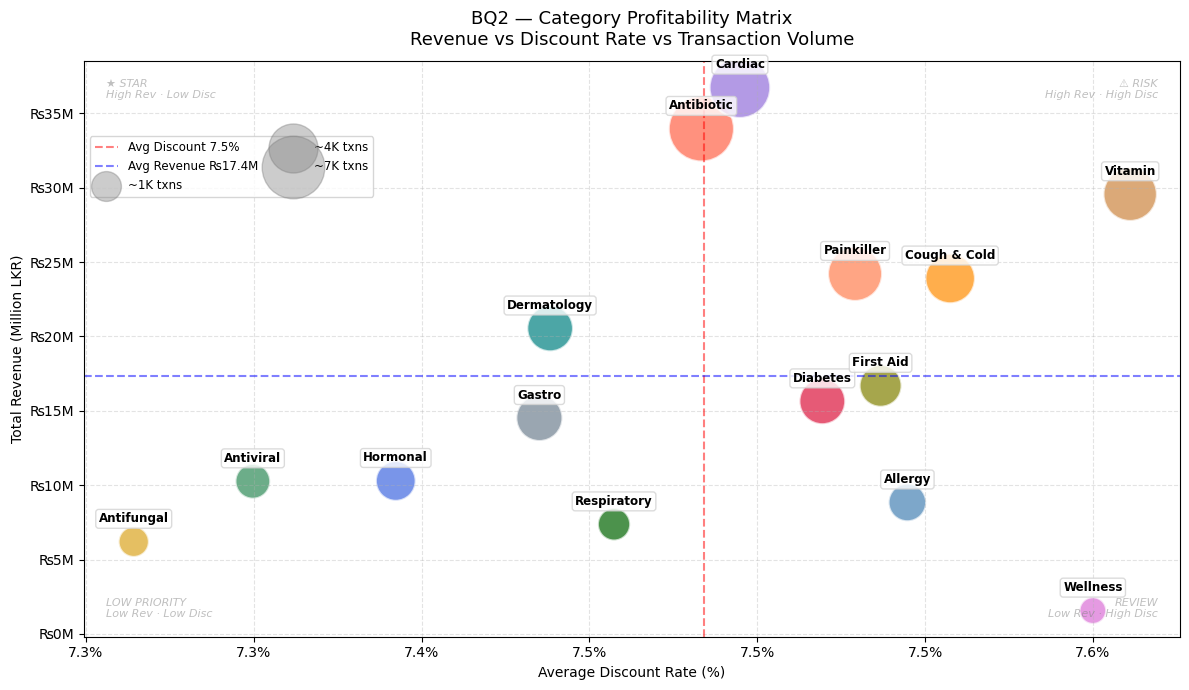

In [171]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(cat_stats["AvgDiscount"] * 100,
           cat_stats["Revenue"] / 1e6,
           s=sizes,
           c=colors[:len(cat_stats)],
           alpha=0.7,
           edgecolors="white",
           linewidths=1.5)
#code for category on each label of bubble
for _, row in cat_stats.iterrows():
    ax.annotate(row["Medicine_Category"],
                xy=(row["AvgDiscount"] * 100, row["Revenue"] / 1e6),
                xytext=(0, 14),
                textcoords="offset points",
                ha="center", fontsize=8.5,
                fontweight="bold",
                bbox=dict(boxstyle="round,pad=0.25",fc="white", ec="lightgrey",alpha=0.80))

#reference lines for averages
avg_discount = cat_stats["AvgDiscount"].mean() * 100
avg_revenue  = cat_stats["Revenue"].mean() / 1e6

ax.axvline(avg_discount, color="red", linestyle="--",
           alpha=0.5, label=f"Avg Discount {avg_discount:.1f}%")
ax.axhline(avg_revenue, color="blue", linestyle="--",
           alpha=0.5, label=f"Avg Revenue ₨{avg_revenue:.1f}M")

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
quadrant_labels = [
    ("★ STAR\nHigh Rev · Low Disc",   0.02, 0.97, "left",  "top"),
    ("⚠ RISK\nHigh Rev · High Disc",  0.98, 0.97, "right", "top"),
    ("LOW PRIORITY\nLow Rev · Low Disc", 0.02, 0.03, "left",  "bottom"),
    ("REVIEW\nLow Rev · High Disc",   0.98, 0.03, "right", "bottom"),
]

for label, x, y, ha, va in quadrant_labels:
    ax.text(x, y, label,
            transform=ax.transAxes,
            fontsize=8, color="grey",
            alpha=0.5, ha=ha, va=va,
            style="italic")


for n_txn, lbl in [(1000, "~1K txns"),
                   (4000, "~4K txns"),
                   (7000, "~7K txns")]:
    size = (n_txn / cat_stats["Transactions"].max() * 2000 + 200)
    ax.scatter([], [], s=size, color="grey",
               alpha=0.4, label=lbl)

# Labels and formatting
ax.set_title("BQ2 — Category Profitability Matrix\n"
             "Revenue vs Discount Rate vs Transaction Volume",
             fontsize=13, pad=12)
ax.set_xlabel("Average Discount Rate (%)", fontsize=10)
ax.set_ylabel("Total Revenue (Million LKR)", fontsize=10)
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda v, _: f"₨{v:.0f}M"))
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda v, _: f"{v:.1f}%"))
ax.legend(fontsize=8.5, loc="upper left",
          bbox_to_anchor=(0.0, 0.88),
          framealpha=0.8, ncol=2)
ax.grid(axis="both", linestyle="--", alpha=0.35)

plt.tight_layout()
plt.savefig("BQ2_stage3.png", dpi=150, bbox_inches="tight")
plt.show()

**Radar Chart**

In [140]:
branch_kpi = sales_cleaned.groupby("Branch_Short").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgTicket=("Line_Total_LKR", "mean"),
    AvgDiscount=("Discount_Rate", "mean"),
    PrescRatio=("Prescription_Required", lambda x: (x == "Yes").mean()),
    UniqueCategories=("Medicine_Category", "nunique"),
).reset_index()

kpis = ["Revenue", "Transactions", "AvgTicket","PrescRatio", "UniqueCategories"]

for col in kpis:
    mn, mx = branch_kpi[col].min(), branch_kpi[col].max()
    branch_kpi[f"N_{col}"] = (branch_kpi[col] - mn) / (mx - mn) #normalisation fo KPI between 0 and 1

    mn, mx = branch_kpi["AvgDiscount"].min(), branch_kpi["AvgDiscount"].max()
branch_kpi["N_MarginScore"] = 1 - (branch_kpi["AvgDiscount"] - mn) / (mx - mn)
# Invert discount — lower discount = higher margin score

In [141]:
radar_cols   = ["N_Revenue", "N_Transactions", "N_AvgTicket","N_PrescRatio", "N_UniqueCategories", "N_MarginScore"]
radar_labels = ["Revenue", "Transactions", "Avg Ticket","Rx Ratio", "Cat. Mix", "Margin Score"]

In [142]:
angles = np.linspace(0, 2 * np.pi, len(radar_labels),endpoint=False).tolist()
angles += angles[:1]

colors = ["steelblue", "tomato", "goldenrod", "seagreen","mediumpurple", "darkorange", "teal"]

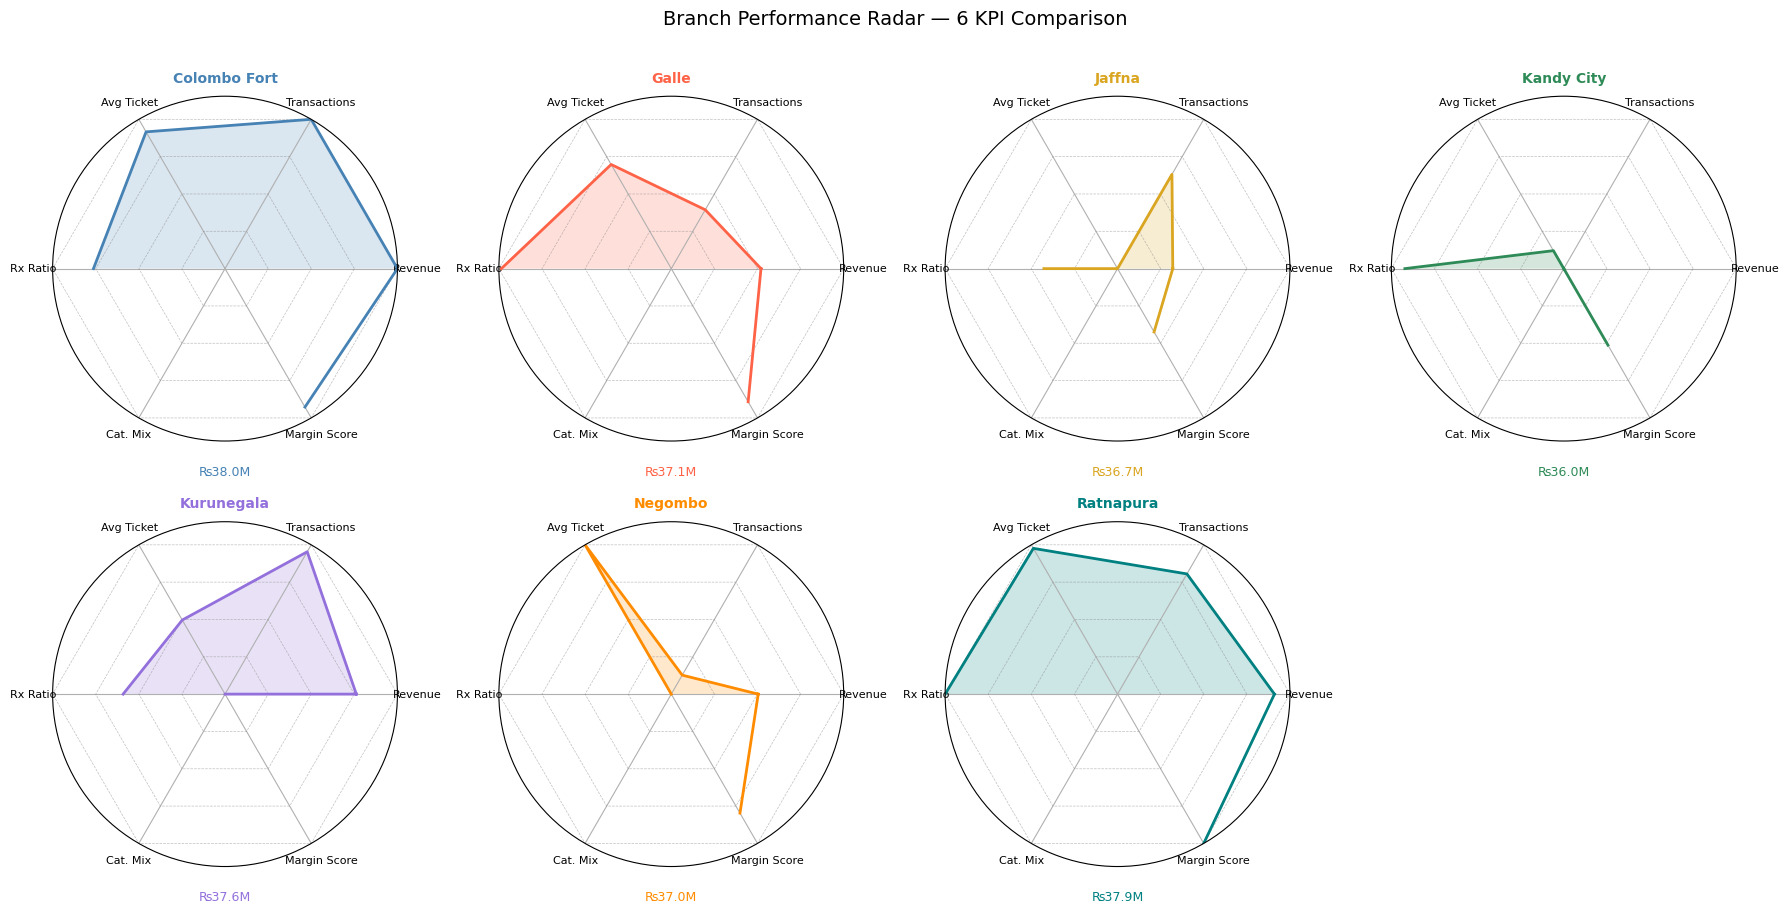

In [143]:
fig, axes = plt.subplots(2, 4, figsize=(18, 9),subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, (_, row) in enumerate(branch_kpi.iterrows()):
    ax    = axes[idx]
    color = colors[idx]

    values   = [row[k] for k in radar_cols]
    values  += values[:1]

    # Background rings
    for r in [0.25, 0.5, 0.75, 1.0]:
        ax.plot(angles, [r] * (len(angles)),color="grey", linewidth=0.5,linestyle="--", alpha=0.5)

    # Plot radar shape
    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.2)

    # Axis labels
    ax.set_thetagrids(np.degrees(angles[:-1]),
                      radar_labels, fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_title(row["Branch_Short"], fontsize=10,
                 fontweight="bold", color=color, pad=10)

    # Revenue label below each subplot
    ax.text(0.5, -0.1, f"₨{row['Revenue']/1e6:.1f}M",
            transform=ax.transAxes, ha="center",
            fontsize=9, color=color)

# Hide last empty subplot
axes[-1].set_visible(False)

plt.suptitle("Branch Performance Radar — 6 KPI Comparison",
             fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

**Violin Plot**

In [145]:
#top 5 categories by revenue
top5 = (sales_cleaned.groupby("Medicine_Category")["Line_Total_LKR"].sum().nlargest(5).index.tolist())

In [151]:
sales_cleaned5 = sales_cleaned[sales_cleaned["Medicine_Category"].isin(top5)] # i only need to show top 5 only

In [152]:
colors = ["steelblue", "tomato", "goldenrod","seagreen", "mediumpurple"]

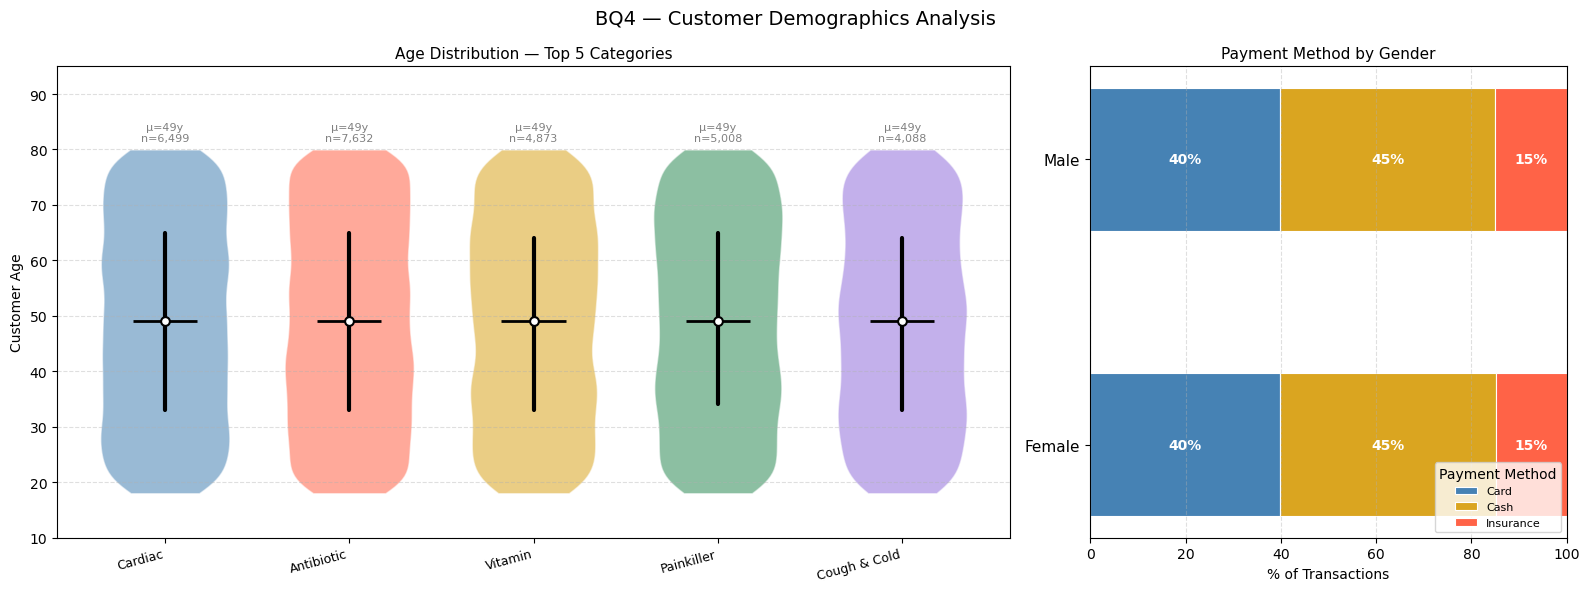

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6),gridspec_kw={"width_ratios": [2, 1]})

#left panel
age_data = [sales_cleaned[sales_cleaned["Medicine_Category"] == cat]["Customer_Age"].values for cat in top5]
parts = ax1.violinplot(age_data,positions=range(len(top5)),widths=0.7,showmedians=True,showextrema=False)
#setting color for each violin
for i, (pc, color) in enumerate(zip(parts["bodies"], colors)):
    pc.set_facecolor(color)
    pc.set_alpha(0.55)
    pc.set_edgecolor("white")

parts["cmedians"].set_color("black")
parts["cmedians"].set_linewidth(2)

# IQR box and mean label on each violin
for i, (cat, color) in enumerate(zip(top5, colors)):
    ages = sales_cleaned5[sales_cleaned5["Medicine_Category"] == cat]["Customer_Age"]
    q1, med, q3 = ages.quantile([0.25, 0.5, 0.75])

    # IQR box
    ax1.plot([i, i], [q1, q3], color="black",linewidth=3, solid_capstyle="round")
    ax1.scatter([i], [med], color="white", s=40,zorder=5, edgecolors="black", linewidths=1.5)

    # Mean label
    ax1.text(i, ages.max() + 1.5,f"μ={ages.mean():.0f}y\nn={len(ages):,}",ha="center", fontsize=8, color="grey")
ax1.set_ylim(10, 95) 
ax1.set_xticks(range(len(top5)))
ax1.set_xticklabels(top5, rotation=15, ha="right", fontsize=9)
ax1.set_ylabel("Customer Age")
ax1.set_title("Age Distribution — Top 5 Categories", fontsize=11)
ax1.grid(axis="y", linestyle="--", alpha=0.4)


gp = (sales_cleaned.groupby(["Customer_Gender", "Payment_Method"])
        .size()
        .unstack("Payment_Method")
        .fillna(0))
gp_pct = gp.div(gp.sum(axis=1), axis=0) * 100

pay_colors = ["steelblue", "goldenrod", "tomato"]
bottom = np.zeros(len(gp_pct))

for col, color in zip(gp_pct.columns, pay_colors):
    bars = ax2.barh(gp_pct.index, gp_pct[col],
                    left=bottom, color=color,
                    label=col, height=0.5,
                    edgecolor="white", linewidth=0.8)

    # Add % labels inside bars
    for bar, bv in zip(bars, bottom):
        w = bar.get_width()
        if w > 5:
            ax2.text(bv + w / 2,
                     bar.get_y() + bar.get_height() / 2,
                     f"{w:.0f}%", ha="center", va="center",
                     fontsize=10, color="white",
                     fontweight="bold")
    bottom += gp_pct[col].values

ax2.set_xlim(0, 100)
ax2.set_xlabel("% of Transactions")
ax2.set_title("Payment Method by Gender", fontsize=11)
ax2.legend(title="Payment Method", fontsize=8,
           loc="lower right")
ax2.grid(axis="x", linestyle="--", alpha=0.4)
ax2.tick_params(axis="y", labelsize=11)

plt.suptitle("BQ4 — Customer Demographics Analysis", fontsize=14)
plt.tight_layout()
plt.show()